<a href="https://colab.research.google.com/github/ScriptSherpa/TensorFlow-Basic-to-Advanced---100-Projects-in-100-Days/blob/main/Sentiment_Analysis_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Step-by-Step Guide to Building a Sentiment Analysis Model using BERT and **TensorFlow**

In [1]:

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
import nltk
nltk.download('twitter_samples')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

Step 2: Loading and Preprocessing Data
For sentiment analysis, we need a labeled dataset of text and corresponding sentiment labels. NLTK provides the Twitter samples dataset:

In [3]:
from nltk.corpus import twitter_samples
import random

# Load twitter samples dataset
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

# Combine the datasets and create labels
tweets = positive_tweets + negative_tweets
labels = ['Positive'] * len(positive_tweets) + ['Negative'] * len(negative_tweets)

# Shuffle the dataset
combined = list(zip(tweets, labels))
random.shuffle(combined)
tweets, labels = zip(*combined)

Step 3: Tokenization
Tokenization is the process of splitting text into individual words or tokens. NLTK provides a simple way to tokenize text:

In [6]:
import nltk
nltk.download('punkt_tab') # Download the punkt_tab data package
from nltk.tokenize import word_tokenize

sample_text = "I love this product! It's amazing."
tokens = word_tokenize(sample_text)
print(tokens)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['I', 'love', 'this', 'product', '!', 'It', "'s", 'amazing', '.']



Step 4: Removing Stopwords
Stopwords are common words that do not carry significant meaning and can be removed from the text. NLTK has a built-in list of stopwords:

In [8]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

filtered_tokens = remove_stopwords(tokens)
print(filtered_tokens)

['love', 'product', '!', "'s", 'amazing', '.']


Step 5: Stemming and Lemmatization
Stemming and lemmatization are techniques for reducing words to their root forms. NLTK provides tools for both:

In [9]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
print(stemmed_tokens)
print(lemmatized_tokens)

['love', 'product', '!', "'s", 'amaz', '.']
['love', 'product', '!', "'s", 'amazing', '.']


Step 6: Feature Extraction
We need to convert our text data into a format suitable for machine learning algorithms. One common approach is to use a bag-of-words model:

In [10]:
from nltk.probability import FreqDist

all_words = [word.lower() for tweet in tweets for word in word_tokenize(tweet)]
all_words_freq = FreqDist(all_words)

# Select the top 2000 words as features
word_features = list(all_words_freq.keys())[:2000]

def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

# Create feature sets for training and testing
feature_sets = [(document_features(word_tokenize(tweet)), label) for (tweet, label) in zip(tweets, labels)]
train_set, test_set = feature_sets[1000:], feature_sets[:1000]

Step 7: Building a Sentiment Analysis Model
We can use the Naive Bayes classifier, which is simple and effective for text classification tasks:

In [11]:
from nltk.classify import NaiveBayesClassifier

classifier = NaiveBayesClassifier.train(train_set)

Step 8: Training and Evaluate the Model
To evaluate our model, we can use the accuracy metric:

In [12]:
import nltk.classify.util

accuracy = nltk.classify.util.accuracy(classifier, test_set)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 99.50%


In [13]:
classifier.show_most_informative_features(10)

Most Informative Features
             contains()) = True           Positi : Negati =     64.6 : 1.0
             contains(() = True           Negati : Positi =     63.9 : 1.0
           contains(sad) = True           Negati : Positi =     27.3 : 1.0
          contains(miss) = True           Negati : Positi =     21.8 : 1.0
          contains(glad) = True           Positi : Negati =     18.3 : 1.0
       contains(arrived) = True           Positi : Negati =     17.3 : 1.0
          contains(blog) = True           Positi : Negati =     16.3 : 1.0
       contains(welcome) = True           Positi : Negati =     14.7 : 1.0
          contains(lost) = True           Negati : Positi =     13.7 : 1.0
         contains(loves) = True           Positi : Negati =     12.7 : 1.0


In [17]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
text = "NLTK is a great library for text processing!"
sentiment_scores = sid.polarity_scores(text)
print(sentiment_scores)

{'neg': 0.0, 'neu': 0.577, 'pos': 0.423, 'compound': 0.6588}


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [15]:
# Classifying a new sentence using the trained classifier
test_sentence = "This is an amazing movie!"
test_features = document_features(word_tokenize(test_sentence))
classification = classifier.classify(test_features)
print(classification)

Positive


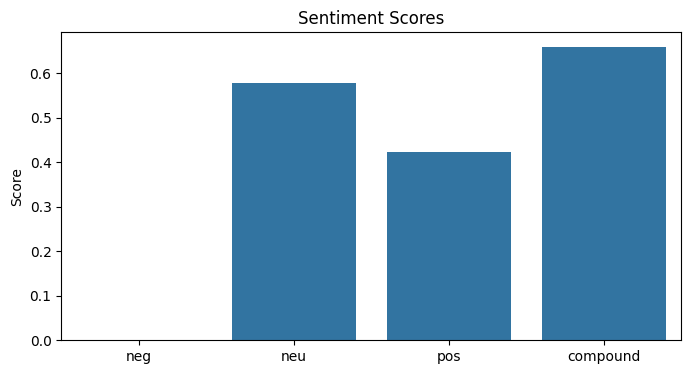

In [19]:
# Visualizing Sentiment Scores
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib
import seaborn as sns # Import seaborn

def plot_sentiment_scores(sentiment_scores):
    plt.figure(figsize=(8, 4))
    sns.barplot(x=list(sentiment_scores.keys()), y=list(sentiment_scores.values()))
    plt.title('Sentiment Scores')
    plt.ylabel('Score')
    plt.show()

plot_sentiment_scores(sentiment_scores)

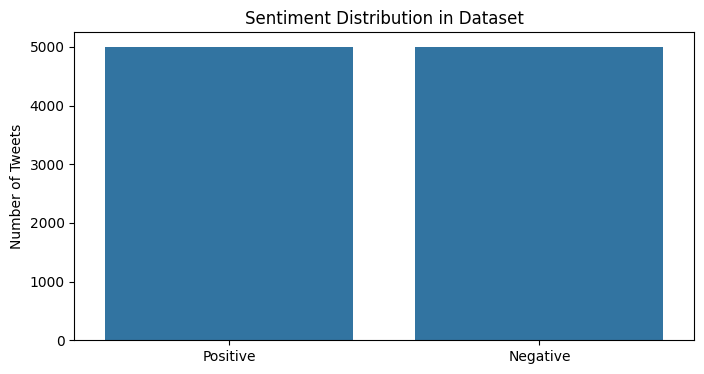

In [20]:
# Visualizing the Sentiment Distribution in the Dataset
def plot_sentiment_distribution(labels):
    sentiment_dist = FreqDist(labels)
    plt.figure(figsize=(8, 4))
    sns.barplot(x=list(sentiment_dist.keys()), y=list(sentiment_dist.values()))
    plt.title('Sentiment Distribution in Dataset')
    plt.ylabel('Number of Tweets')
    plt.show()

plot_sentiment_distribution(labels)